## Importing all the necessary libraries

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

### Upload CSV File 

In [2]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
ProductionTank

,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


### Filter the ProductionTank df to show only 22MT04 production results

In [5]:
ProductionTank2204_df= ProductionTank.query('Tank_1 == "%s"' % 2204)
print(ProductionTank2204_df) 

      Material    BATCHID Tank_1                  Instruction_Step INGRED_ID  \
2033   1397022  107969769   2204              S3_BATCH_IN_PROGRESS       NaN   
2034   1397022  107969769   2204                        STEP1_CONS   1002565   
2035   1397022  107969769   2204       PLEASE VERIFY BULK ADDITION       NaN   
2036   1397022  107969769   2204                        STEP1_CONS   1037802   
2037   1397022  107969769   2204                        STEP1_CONS   1002818   
...        ...        ...    ...                               ...       ...   
7801   1775253  108042636   2204      S4_BATCH_COMPLETE_QA_PENDING       NaN   
7802   1775253  108042636   2204  TAKE A SAMPLE AND SUBMIT FOR QA.       NaN   
7803   1775253  108042636   2204        SAMPLE TO LAB. RESULTS OK?       NaN   
7804   1775253  108042636   2204      S4_BATCH_COMPLETE_QA_PENDING       NaN   
7805   1775253  108042636   2204            S7_RELEASED_TO_FILLING       NaN   

                               INGRED_N

### Filter the ProductionTank2204_df by Material and Material_Name columns

NB: Looking at ingredients ( Material_Name ) addition in the material production in this tank 2204

In [6]:
# Group by the 'Material','Material_Name' column
#grouped = ProductionTank2204_df.groupby(['Material'])

#grouped.head()
# Apply aggregation functions to the grouped data
#mean_values = grouped.mean()
#sum_values = grouped['Quantity'].sum()
#count_values = grouped['Phase_duration'].count()

#print("Mean Values:")
#print(mean_values)

#print("\nSum Values:")
#print(sum_values)

#print("\nCount Values:")
#print(count_values)

### Aggregation of data per tank : by Material

In [7]:
#Aggregate data per tank
aggregated_ProductionTank2204_df = ProductionTank2204_df.groupby(['Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank2204_df)

### Aggregation of data per tank : by BATCHID

In [8]:
#Aggregate data per tank
aggregated_ProductionTank2204_df1 = ProductionTank2204_df.groupby(['BATCHID','Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'mean',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2204_df1)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107848868   1520984             879      45.714286         167.933333   
1   107862335   1698522             530      13.125000         307.705882   
2   107872112   1520984            3170     194.800000           1.812500   
3   107899925   1775253            1444      72.187500         108.352941   
4   107907563   1428047             750      24.450000         111.714286   
5   107915806   1698522             485       9.750000         287.411765   
6   107925352   1520984             417      11.466667         256.875000   
7   107964387   1520984             384       9.866667         212.937500   
8   107969769   1397022             461      12.315789         219.500000   
9   107978118   1775253             353       3.812500         129.235294   
10  107992045   1520984             627      23.750000         238.470588   
11  107999492   1428047             264      30.000000           1.800000   

### Data Visualisation 

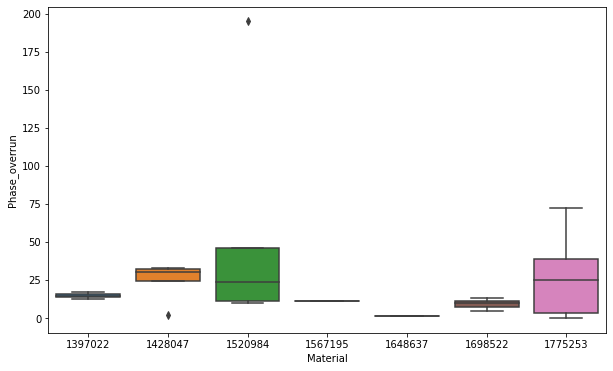

In [9]:
# Box plot to visualize the distribution of Phase_overrun across different Materials
plt.figure(figsize=(10, 6))
sns.boxplot(data=aggregated_ProductionTank2204_df1, x='Material', y='Phase_overrun')
plt.show()

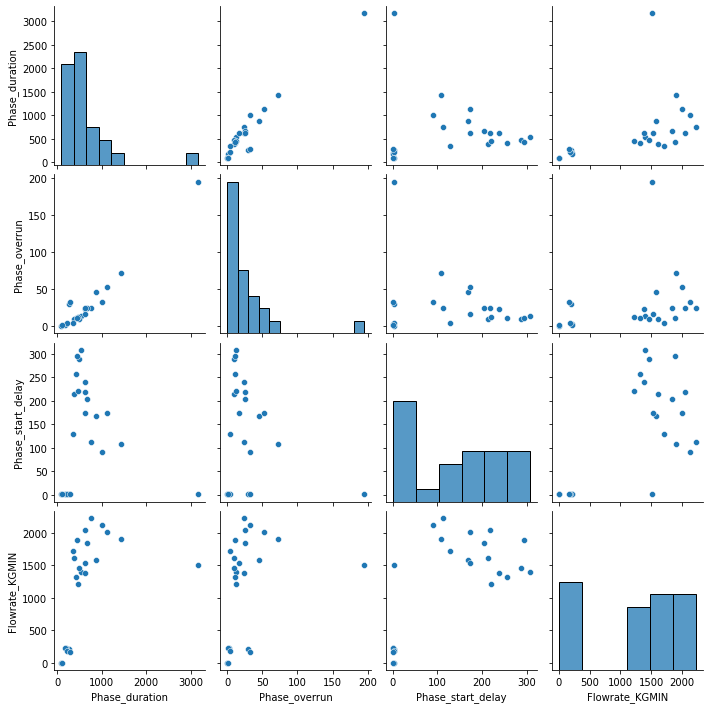

In [10]:
# Pair plot to visualize relationships between numeric variables
numeric_columns = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
sns.pairplot(aggregated_ProductionTank2204_df1[numeric_columns])
plt.show()

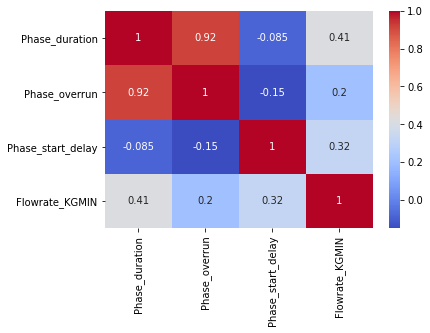

In [12]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = aggregated_ProductionTank2204_df1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
aggregated_ProductionTank2204_df1.info

<bound method DataFrame.info of       BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107848868   1520984             879      45.714286         167.933333   
1   107862335   1698522             530      13.125000         307.705882   
2   107872112   1520984            3170     194.800000           1.812500   
3   107899925   1775253            1444      72.187500         108.352941   
4   107907563   1428047             750      24.450000         111.714286   
5   107915806   1698522             485       9.750000         287.411765   
6   107925352   1520984             417      11.466667         256.875000   
7   107964387   1520984             384       9.866667         212.937500   
8   107969769   1397022             461      12.315789         219.500000   
9   107978118   1775253             353       3.812500         129.235294   
10  107992045   1520984             627      23.750000         238.470588   
11  107999492   1428047             264     

In [12]:
# Handling missing values
aggregated_ProductionTank2204_df1.dropna(inplace=True)  # Remove rows with missing values

In [13]:
# Handling duplicates
aggregated_ProductionTank2204_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [14]:
print(aggregated_ProductionTank2204_df1.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107848868   1520984             879      45.714286         167.933333   
1  107862335   1698522             530      13.125000         307.705882   
2  107872112   1520984            3170     194.800000           1.812500   
3  107899925   1775253            1444      72.187500         108.352941   
4  107907563   1428047             750      24.450000         111.714286   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0       1583.2285              16.266667       302.778350  
1       1393.4183              19.176471       152.181450  
2       1508.6187              16.250000       270.812300  
3       1901.6146              17.352941       247.907363  
4       2225.0568              13.952381       188.249709  


In [15]:
# Define columns where you want to detect and remove outliers
ProductionTank2204_df2 = pd.DataFrame(aggregated_ProductionTank2204_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank2204_df2 = remove_outliers_iqr(ProductionTank2204_df2, col)

# Display the cleaned DataFrame
print(ProductionTank2204_df2)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107848868   1520984             879      45.714286         167.933333   
1   107862335   1698522             530      13.125000         307.705882   
4   107907563   1428047             750      24.450000         111.714286   
5   107915806   1698522             485       9.750000         287.411765   
6   107925352   1520984             417      11.466667         256.875000   
7   107964387   1520984             384       9.866667         212.937500   
8   107969769   1397022             461      12.315789         219.500000   
9   107978118   1775253             353       3.812500         129.235294   
10  107992045   1520984             627      23.750000         238.470588   
14  108015839   1397022             625      16.894737         172.650000   
15  108026760   1775253             669      25.066667         203.937500   
17  108042635   1775253             627      25.000000         218.375000   

In [17]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank2204_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank2204_df2.describe())

Original DataFrame Summary Statistics:
            BATCHID      Material  Phase_duration  Phase_overrun  \
count  2.200000e+01  2.200000e+01       22.000000      22.000000   
mean   1.079794e+08  1.584249e+06      686.772727      29.776541   
std    7.185902e+04  1.496785e+05      640.639408      40.827909   
min    1.078489e+08  1.397022e+06      167.000000       1.666667   
25%    1.079182e+08  1.428047e+06      360.750000      10.150000   
50%    1.079958e+08  1.520984e+06      507.500000      20.322368   
75%    1.080319e+08  1.756070e+06      729.750000      31.500000   
max    1.080847e+08  1.775253e+06     3170.000000     194.800000   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count          22.000000       22.000000              22.000000   
mean          145.501816     1350.380855              20.760431   
std           107.124214      692.948859               8.835381   
min             0.400000      162.513800              11.850000   
25%          

In [18]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank2204_df2[numerical_cols] = scaler.fit_transform(ProductionTank2204_df2[numerical_cols])
print(ProductionTank2204_df2.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107848868   1520984        1.571829       2.512188          -0.323560   
1  107862335   1698522       -0.171502      -0.439921           1.397099   
4  107907563   1428047        0.927445       0.585957          -1.015640   
5  107915806   1698522       -0.396287      -0.745646           1.147270   
6  107925352   1520984       -0.735962      -0.590141           0.771350   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0        0.037115              16.266667       302.778350  
1       -0.364099              19.176471       152.181450  
4        1.393785              13.952381       188.249709  
5       -0.231577              20.235294       145.112670  
6       -0.530199              16.250000       270.812300  


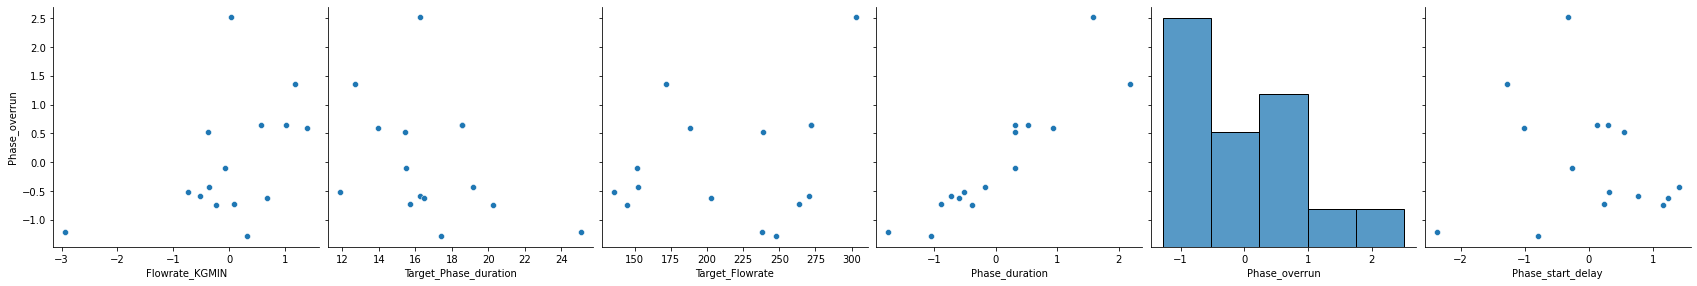

In [20]:
#Step 3: Visualization
#Let us plot the scatter plot for target variable vs. predictor variables in a single plot to get the intuition. Also, plotting a heatmap for all the variables,

#Importing seaborn library for visualizations
import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(ProductionTank2204_df2, x_vars=['Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate','Phase_duration','Phase_overrun','Phase_start_delay'], y_vars = 'Phase_overrun', size = 4, kind = 'scatter' )
plt.show()

### Applying Machine Learning Algorithms 

In [20]:
#pip install lightgbm

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank2204_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2204_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)


# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2204results.xlsx', index=False)

+----+-----------------------------+-------------+------------+------------+------------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |    Test R2 |
+====+=============================+=============+============+============+============+
|  0 | Linear Regression           | 0.0176779   |   0.322337 |   0.971716 |  0.733247  |
+----+-----------------------------+-------------+------------+------------+------------+
|  1 | Ridge Regression            | 0.0295408   |   0.609509 |   0.952735 |  0.495595  |
+----+-----------------------------+-------------+------------+------------+------------+
|  2 | Lasso Regression            | 0.493089    |   3.2837   |   0.211061 | -1.71746   |
+----+-----------------------------+-------------+------------+------------+------------+
|  3 | Random Forest Regressor     | 0.0249944   |   1.48003  |   0.960009 | -0.224812  |
+----+-----------------------------+-------------+------------+------------+------------+
|  4 | Gra

In [24]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
   
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
    
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")

LinearRegression:
  Mean MSE: 0.646334
  Std MSE: 0.403316

Ridge:
  Mean MSE: 0.480029
  Std MSE: 0.221184

Lasso:
  Mean MSE: 2.403367
  Std MSE: 1.412716

RandomForestRegressor:
  Mean MSE: 0.355682
  Std MSE: 0.539727

GradientBoostingRegressor:
  Mean MSE: 0.481953
  Std MSE: 0.395127

SVR:
  Mean MSE: 1.408413
  Std MSE: 1.042342

MLPRegressor:
  Mean MSE: 2363120208683.500977
  Std MSE: 2303086079424.264648

DecisionTreeRegressor:
  Mean MSE: 1.099819
  Std MSE: 0.859138

ExtraTreesRegressor:
  Mean MSE: 0.417544
  Std MSE: 0.435496

AdaBoostRegressor:
  Mean MSE: 0.423868
  Std MSE: 0.565400

BaggingRegressor:
  Mean MSE: 0.378426
  Std MSE: 0.523272



In [25]:

from sklearn.model_selection import train_test_split, GridSearchCV


# Load your dataset (replace 'ProductionTank2204_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2204_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)


# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)


# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2204TUNresults.xlsx', index=False)

+----+-----------------------------+-------------+------------+------------+------------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |    Test R2 |
+====+=============================+=============+============+============+============+
|  0 | Linear Regression           | 0.0176779   |   0.322337 |   0.971716 |  0.733247  |
+----+-----------------------------+-------------+------------+------------+------------+
|  1 | Ridge Regression            | 0.0295408   |   0.609509 |   0.952735 |  0.495595  |
+----+-----------------------------+-------------+------------+------------+------------+
|  2 | Lasso Regression            | 0.0473934   |   0.834158 |   0.924171 |  0.309685  |
+----+-----------------------------+-------------+------------+------------+------------+
|  3 | Random Forest Regressor     | 0.0193604   |   1.49364  |   0.969024 | -0.236076  |
+----+-----------------------------+-------------+------------+------------+------------+
|  4 | Gra